In [58]:
import os

import ase
from ase.io import read, write
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
import h5py

In [5]:
FOLDER = "/lustre/work/ws/ws1/ka_he8978-dipeptide/training/10_amp_qmmm/B3LYP_aug-cc-pVTZ_water/01_start/results/AMPQMMM_model_2025-04-20-23-53"
FILE = "amp_qmmm_geoms.extxyz"

In [44]:
ref_energy_key = "qm_energies_ref"
ref_gradient_key = "qm_gradients_ref"
ref_dipole_key = "dipole_ref"
ref_quadrupole_key = "quadrupole_ref"

pred_energy_key = "qm_energies_pred"
pred_gradient_key = "qm_gradients_pred"
pred_dipole_key = "dipole_pred"
pred_quadrupole_key = "quadrupole_pred"

def get_properties(folder, file):
    """
    Get the properties of the system from the extxyz file.
    """
    # Read the extxyz file
    atoms: ase.Atoms = read(os.path.join(folder, file), index=":")
    
    # Get the properties
    ref_energy = []
    ref_gradient = []
    ref_dipole = []
    ref_quadrupole = []
    pred_energy = []
    pred_gradient = []
    pred_dipole = []
    pred_quadrupole = []

    for i, atom in enumerate(atoms):
        # Get the properties
        ref_energy.append(atom.info[ref_energy_key])
        ref_gradient.append(atom.arrays[ref_gradient_key])
        ref_dipole.append(atom.info[ref_dipole_key])
        ref_quadrupole.append(atom.info[ref_quadrupole_key])
        
        pred_energy.append(atom.info[pred_energy_key])
        pred_gradient.append(atom.arrays[pred_gradient_key])
        pred_dipole.append(atom.info[pred_dipole_key])
        pred_quadrupole.append(atom.info[pred_quadrupole_key])

    
    # Convert to numpy arrays
    ref_energy = np.array(ref_energy)
    ref_gradient = np.array(ref_gradient).flatten()
    ref_dipole = np.array(ref_dipole).flatten()
    ref_quadrupole = np.array(ref_quadrupole).flatten()
    pred_energy = np.array(pred_energy)
    pred_gradient = np.array(pred_gradient).flatten()
    pred_dipole = np.array(pred_dipole).flatten()
    pred_quadrupole = np.array(pred_quadrupole).flatten()

    return ref_energy, ref_gradient, ref_dipole, ref_quadrupole, pred_energy, pred_gradient, pred_dipole, pred_quadrupole

ref_energy, ref_gradient, ref_dipole, ref_quadrupole, pred_energy, pred_gradient, pred_dipole, pred_quadrupole = get_properties(FOLDER, FILE)

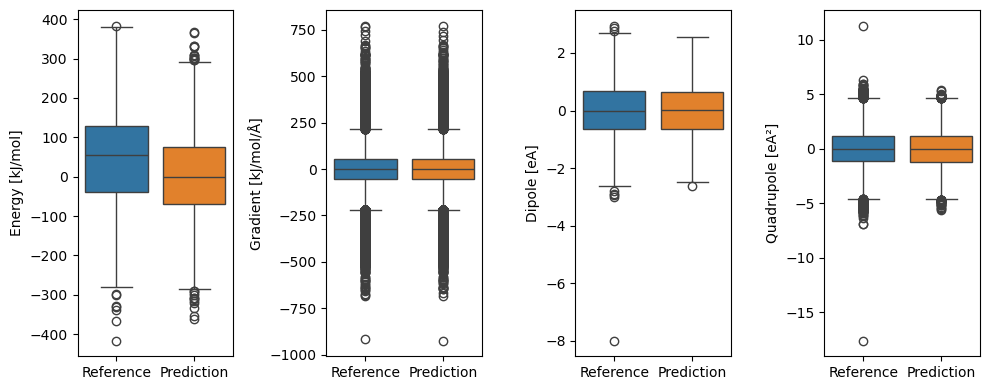

In [ ]:
# Create individual boxplots
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

# Plot each boxplot in the corresponding subplot
plot_data = [
    (ref_energy, pred_energy, "Energy [kJ/mol]"),
    (ref_gradient, pred_gradient, "Gradient [kJ/mol/Å]"),
    (ref_dipole, pred_dipole, "Dipole [eÅ]"),
    (ref_quadrupole, pred_quadrupole, "Quadrupole [eÅ²]"),
]

for ax, (reference, prediction, ylabel) in zip(axs, plot_data):
    df = pd.DataFrame({"Reference": reference, "Prediction": prediction})
    sns.boxplot(data=df, ax=ax)
    ax.set_ylabel(ylabel)

plt.tight_layout()


In [61]:
FOLDER = "/lustre/work/ws/ws1/ka_he8978-dipeptide/training_data/B3LYP_aug-cc-pVTZ_water"
FILE = "dipeptide.hdf5"

In [77]:
ref_energy_key = "qm_energies"
ref_gradient_key = "qm_gradients"
ref_dipole_key = "qm_dipoles"
ref_quadrupole_key = "qm_quadrupoles"

def get_properties_hdf5(folder, file):
    """
    Get the properties of the system from the hdf5 file.
    """
    
    ref_energy = []
    ref_gradient = []
    ref_dipole = []
    ref_quadrupole = []

    with h5py.File(os.path.join(folder, file), "r") as f:
        for group_name in f.keys():
            group = f[group_name]
            ref_energy.append(np.array(group[ref_energy_key]))
            ref_gradient.append(np.array(group[ref_gradient_key]))
            ref_dipole.append(np.array(group[ref_dipole_key]))
            ref_quadrupole.append(np.array(group[ref_quadrupole_key]))

    # Convert to numpy arrays
    ref_energy = np.concatenate(ref_energy)
    ref_gradient = np.concatenate(ref_gradient).flatten()
    ref_dipole = np.concatenate(ref_dipole).flatten()
    ref_quadrupole = np.concatenate(ref_quadrupole).flatten()

    return ref_energy, ref_gradient, ref_dipole, ref_quadrupole

ref_energy_hdf5, ref_gradient_hdf5, ref_dipole_hdf5, ref_quadrupole_hdf5 = get_properties_hdf5(FOLDER, FILE)

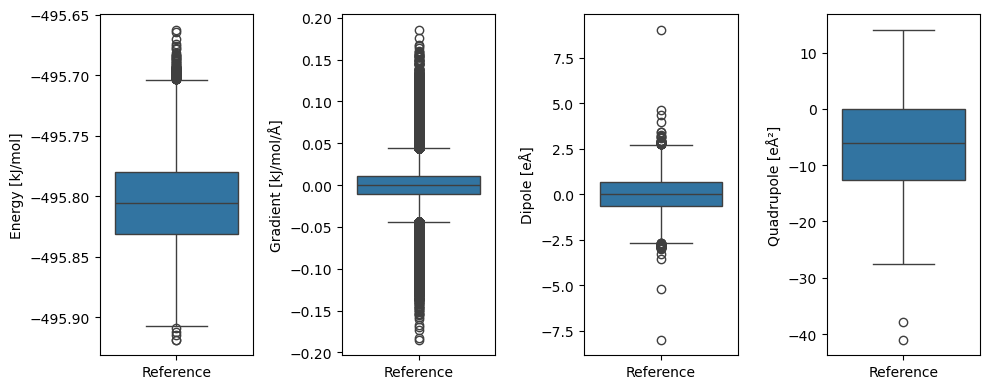

In [79]:
# Create individual boxplots
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

# Plot each boxplot in the corresponding subplot
plot_data = [
    (ref_energy_hdf5, "Energy [kJ/mol]"),
    (ref_gradient_hdf5, "Gradient [kJ/mol/Å]"),
    (ref_dipole_hdf5, "Dipole [eÅ]"),
    (ref_quadrupole_hdf5, "Quadrupole [eÅ²]"),
]

for ax, (reference, ylabel) in zip(axs, plot_data):
    df = pd.DataFrame({"Reference": reference})
    sns.boxplot(data=df, ax=ax)
    ax.set_ylabel(ylabel)
plt.tight_layout()
# Show the plots
plt.show()